In [1]:
import pandas as pd

Датасет https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Всего 81 колонка, из них 38 числовых. 1460 строк данных. Проверим на дубликаты и отсутствующие значения

In [3]:
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [4]:
df[df.columns[df.isnull().any()].to_list()].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Дубликатов нет, отсутсвуюших много, разберемся с ними

In [12]:
df['Electrical'] = df['Electrical'].fillna("Mix")
df['GarageType'] = df['GarageType'].fillna("None")
df['GarageFinish'] = df['GarageFinish'].fillna("None")
df['GarageQual'] = df['GarageQual'].fillna("None")
df['GarageCond'] = df['GarageCond'].fillna("None")
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].max()+1)
df['Alley'] = df['Alley'].fillna("None")
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['BsmtQual'] = df['BsmtQual'].fillna("None")
df['BsmtCond'] = df['BsmtCond'].fillna("None")
df['BsmtExposure'] = df['BsmtExposure'].fillna("None")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("None")
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("None")
df['FireplaceQu'] = df['FireplaceQu'].fillna("None")
df['PoolQC'] = df['PoolQC'].fillna("None")
df['Fence'] = df['Fence'].fillna("None")
df['MiscFeature'] = df['MiscFeature'].fillna("None")

df[df.columns[df.isnull().any()].to_list()].isnull().sum()

Series([], dtype: float64)

Проведем замену категориальных переменных на числовые

In [21]:
from sklearn.preprocessing import LabelEncoder
#Поля для преобреазования
fields = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
 'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
 'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
 'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
 'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

le = LabelEncoder()
for field in fields:
  df[field] = le.fit_transform(df[field].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Проведем разведочный анализ

<Axes: xlabel='SalePrice', ylabel='Count'>

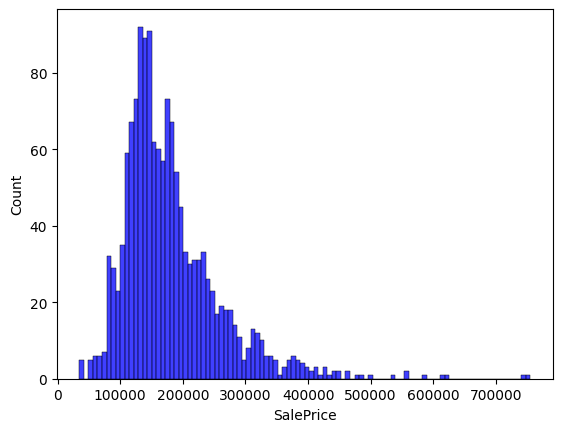

In [26]:
import seaborn as sns

sns.histplot(df['SalePrice'], bins=100, kde=False,  color='blue')

<Axes: xlabel='SalePrice'>

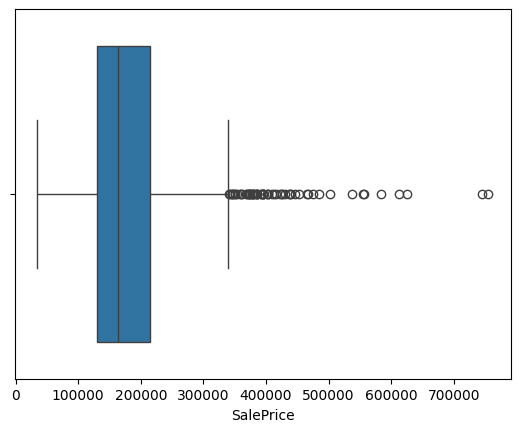

In [27]:
sns.boxplot(x=df['SalePrice'])

Есть довольно дорогие дома, но их немного и у них довольно большие площяди, наличие бассеинов и т.п. возможно это некая элитная недвижимость

<Axes: xlabel='LotArea', ylabel='SalePrice'>

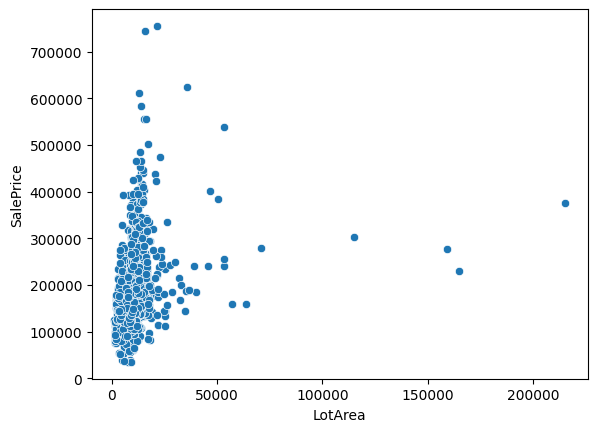

In [28]:
sns.scatterplot(data=df, x="LotArea", y="SalePrice")

Есть зависимость цены от площади

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

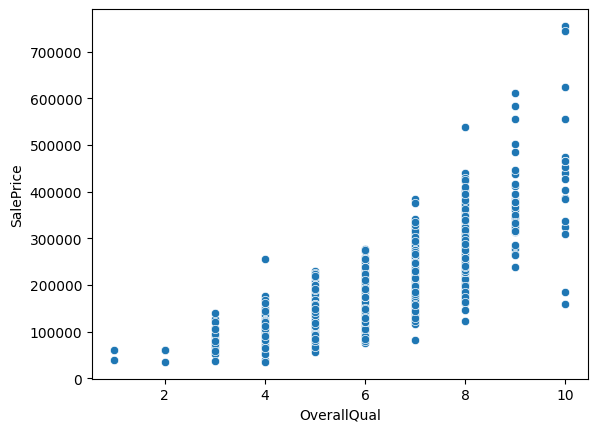

In [29]:
sns.scatterplot(data=df, x="OverallQual", y="SalePrice")

Есть явная зависимость цены от качества материалов отделки

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

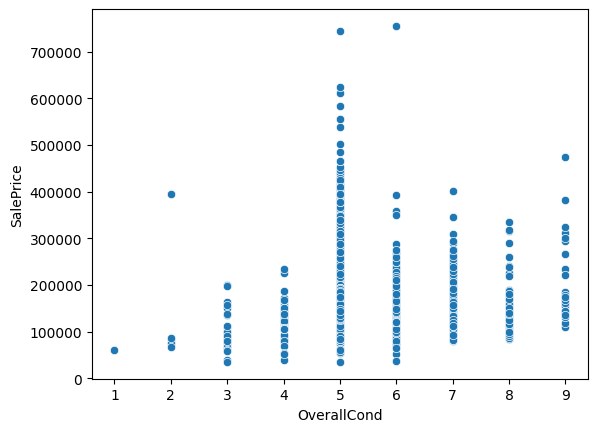

In [30]:
sns.scatterplot(data=df, x="OverallCond", y="SalePrice")

Сильно выраженной зависимости цены от состояния не наблюдается

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

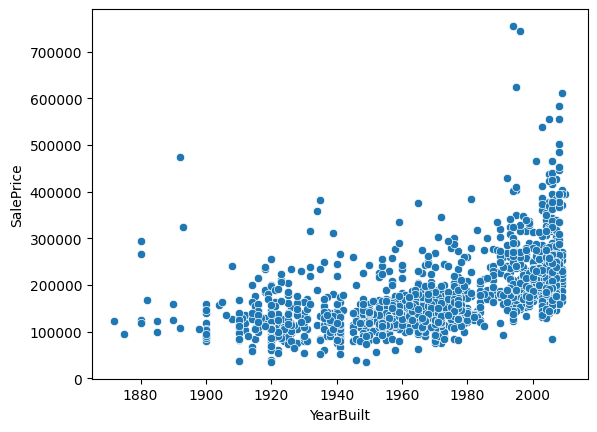

In [35]:
sns.scatterplot(data=df, x="YearBuilt", y="SalePrice")

Заметная зависимость цены от года постройки, далее исследуем другие параметры

<Axes: xlabel='OverallQual', ylabel='Count'>

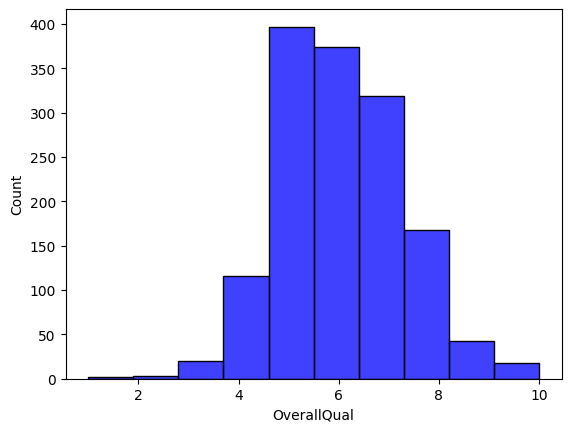

In [39]:
sns.histplot(df['OverallQual'], bins=10, kde=False,  color='blue')

В основном качество чуть выше среднего

<Axes: xlabel='GrLivArea', ylabel='Count'>

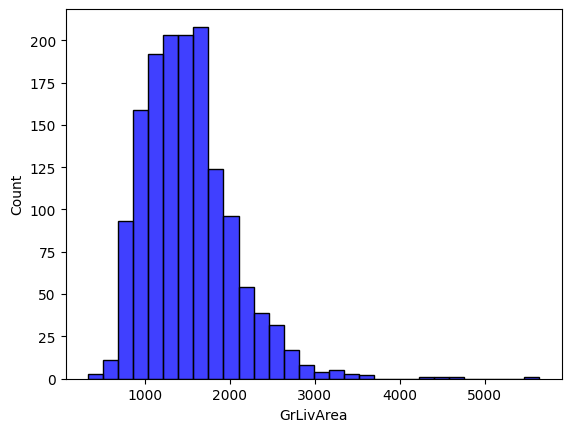

In [40]:
sns.histplot(df['GrLivArea'], bins=30, kde=False,  color='blue')

<Axes: xlabel='LotArea', ylabel='Count'>

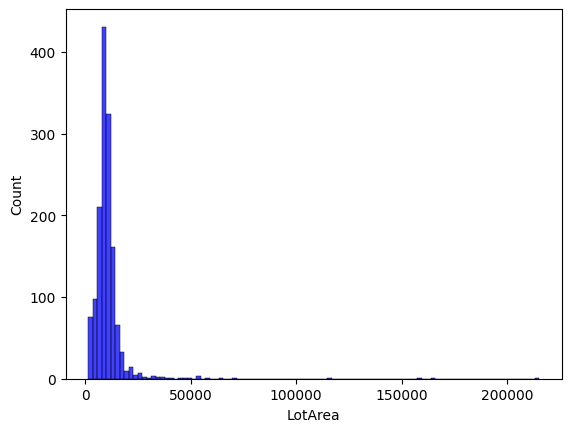

In [42]:
sns.histplot(df['LotArea'], bins=100, kde=False,  color='blue')

<Axes: xlabel='GarageCars', ylabel='Count'>

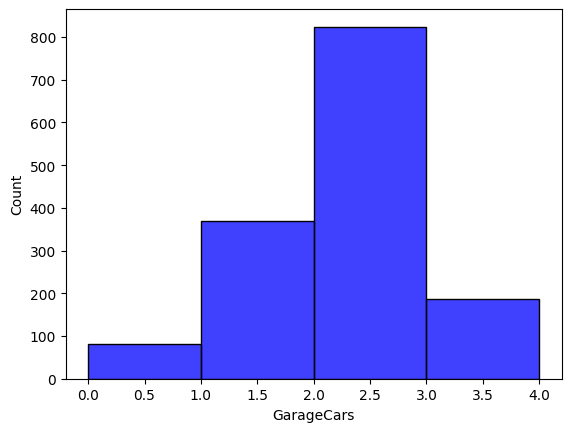

In [44]:
sns.histplot(df['GarageCars'], bins=4, kde=False,  color='blue')

In [45]:
df.to_csv('cleaned_house_prices.csv')